# Business Understanding

In this notebook, I will answer the question: "Which business type and category type of Shops have the highest order count?" and the answer to it. The answer can support the business team prioritize resources on how to expand and focus their efforts.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


# Data Understanding

In [25]:
df = pd.read_csv('./anonymized/Orders-Grid view.csv')
df.head()


,Shop Name,Emirate,Category Type,Business Type,Prices,Status,Email,Phone Number
0,Shop017,Dubai,Home Business,Desserts,Normal,Active,bader@humanagement.me,502809110
1,Shop049,Abu Dhabi,Others,E-Commerce,40,Active,Accounts@baaqah.com,569164145
2,Shop011,Sharjah,Home Business,Desserts,Normal,Active,abdallajumaalali@gmail.com,588002222
3,Shop001,Abu Dhabi,Retail Shop,Sweets,Normal,Active,Manager@morselchocolates.com,565478787
4,Shop016,Dubai,Home Business,Oils & Herbs,30 / 40 between Emirates,Active,Itani_Rasha@msn.com,504551335


In [26]:
#importing shops information
shops_df =  pd.read_excel('./anonymized/Shops Master Sheet.xlsx' , usecols = "A:H")
shops_df.head()

,Shop Name,Emirate,Category Type,Business Type,Prices,Status,Email,Phone Number
0,Shop017,Dubai,Home Business,Desserts,Normal,Active,bader@humanagement.me,502809110
1,Shop049,Abu Dhabi,Others,E-Commerce,40,Active,Accounts@baaqah.com,569164145
2,Shop011,Sharjah,Home Business,Desserts,Normal,Active,abdallajumaalali@gmail.com,588002222
3,Shop001,Abu Dhabi,Retail Shop,Sweets,Normal,Active,Manager@morselchocolates.com,565478787
4,Shop016,Dubai,Home Business,Oils & Herbs,30 / 40 between Emirates,Active,Itani_Rasha@msn.com,504551335


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order ID            4582 non-null   float64
 1   Order Date          5189 non-null   object 
 2   Shop                5189 non-null   object 
 3   Pick Up Emirate     5189 non-null   object 
 4   Drop Off Emirate    5179 non-null   object 
 5   Drop Off Area       4498 non-null   object 
 6   Delivery Company    5189 non-null   object 
 7   Status              5189 non-null   object 
 8   COD                 1475 non-null   object 
 9   Delivery Cost       4202 non-null   object 
 10  Charge to Customer  4278 non-null   object 
 11  Category            4523 non-null   object 
 12  Delivery Route      5189 non-null   object 
 13  Month - Formula     5189 non-null   object 
 14  Month               5189 non-null   object 
dtypes: float64(1), object(14)
memory usage: 608.2+ KB


# Prep Data

In [4]:
#fixing the data type of Order Date
df['Order Date']= pd.to_datetime(df['Order Date'],format='%d/%m/%Y', errors='raise') 

In [28]:
#joining shops information dataframe (columns of interest) to our dataframe from Orders file
merged_df = pd.merge(df, shops_df[['Shop Name','Category Type', 'Business Type']], left_on='Shop', right_on='Shop Name', how='left')
merged_df = merged_df.drop('Shop Name',axis =1)
merged_df.head()


,Order ID,Order Date,Shop,Pick Up Emirate,Drop Off Emirate,Drop Off Area,Delivery Company,Status,COD,Delivery Cost,Charge to Customer,Category,Delivery Route,Month - Formula,Month,Category Type,Business Type
0,6713.0,1/2/2021,Shop001,Abu Dhabi,Dubai,NaN,DeliveryCompany01,Cancelled/Returned,NaN,NaN,NaN,SM,Abu Dhabi to Dubai,February,February,Retail Shop,Sweets
1,3015.0,1/9/2020,Shop002,Dubai,Fujeirah,Hamad bin abdulla road,DeliveryCompany01,Cancelled/Returned,NaN,AED 0.00,AED 0.00,NaN,Dubai to Fujeirah,September,September,Retail Shop,Tea
2,3016.0,1/9/2020,Shop003,Abu Dhabi,Al Ain,Villa 8,DeliveryCompany01,Delivered,NaN,AED 32.00,AED 45.00,NaN,Abu Dhabi to Al Ain,September,September,Retail Shop,Flowers
3,3024.0,1/9/2020,Shop004,Abu Dhabi,Ras Al Khaimah,Alkharan,DeliveryCompany01,Delivered,NaN,AED 32.00,AED 60.00,NaN,Abu Dhabi to Ras Al Khaimah,September,September,Home Business,Flowers
4,3022.0,1/9/2020,Shop005,Sharjah,Abu Dhabi,NaN,DeliveryCompany02,Delivered,NaN,AED 30.00,AED 45.00,NaN,Sharjah to Abu Dhabi,September,September,Others,Desserts & Food


In [29]:
category_types = merged_df.groupby('Category Type')['Shop'].count() #In preperation for visualization, I group category types and count the number of each
business_types = merged_df.groupby('Business Type')['Shop'].count()#In preperation for visualization, I group business types and count the number of each


# Results

## Plotting amount of order by category types of shops

Text(0, 0.5, 'Number of Orders')

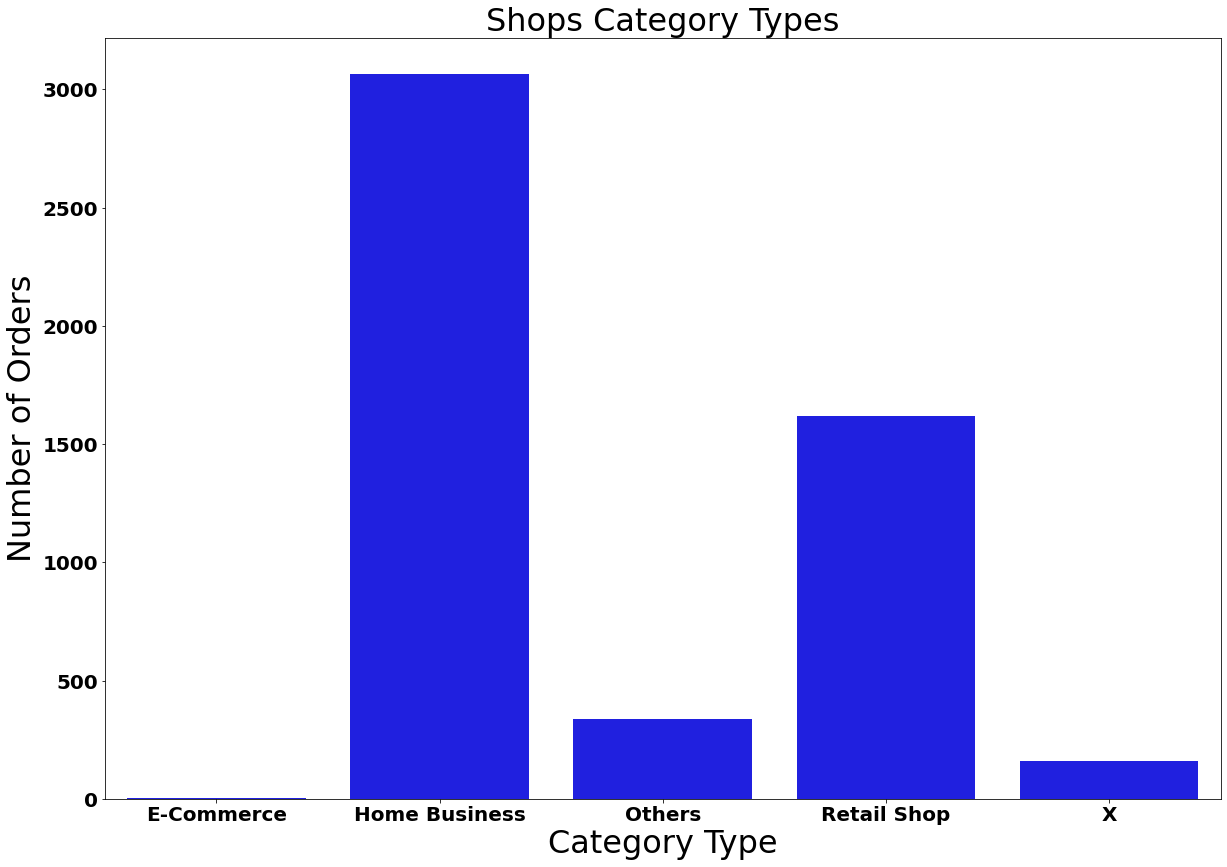

In [18]:
rc={'axes.labelsize': 32, 'font.size': 20, 'font.weight':'bold', 'legend.fontsize': 32.0, 'axes.titlesize': 32, "figure.figsize": (20, 14)}
sns.set_context(rc)

ax = sns.barplot(x = category_types.index, y = category_types.values , color = "blue")
ax.set_title('Shops Category Types')
ax.set_ylabel("Number of Orders")


Since we know previously from other notebooks that Shop017 is an anomaly and has almost 30% of orders, let's try plotting the graph without it.

Text(0, 0.5, 'Number of Orders')

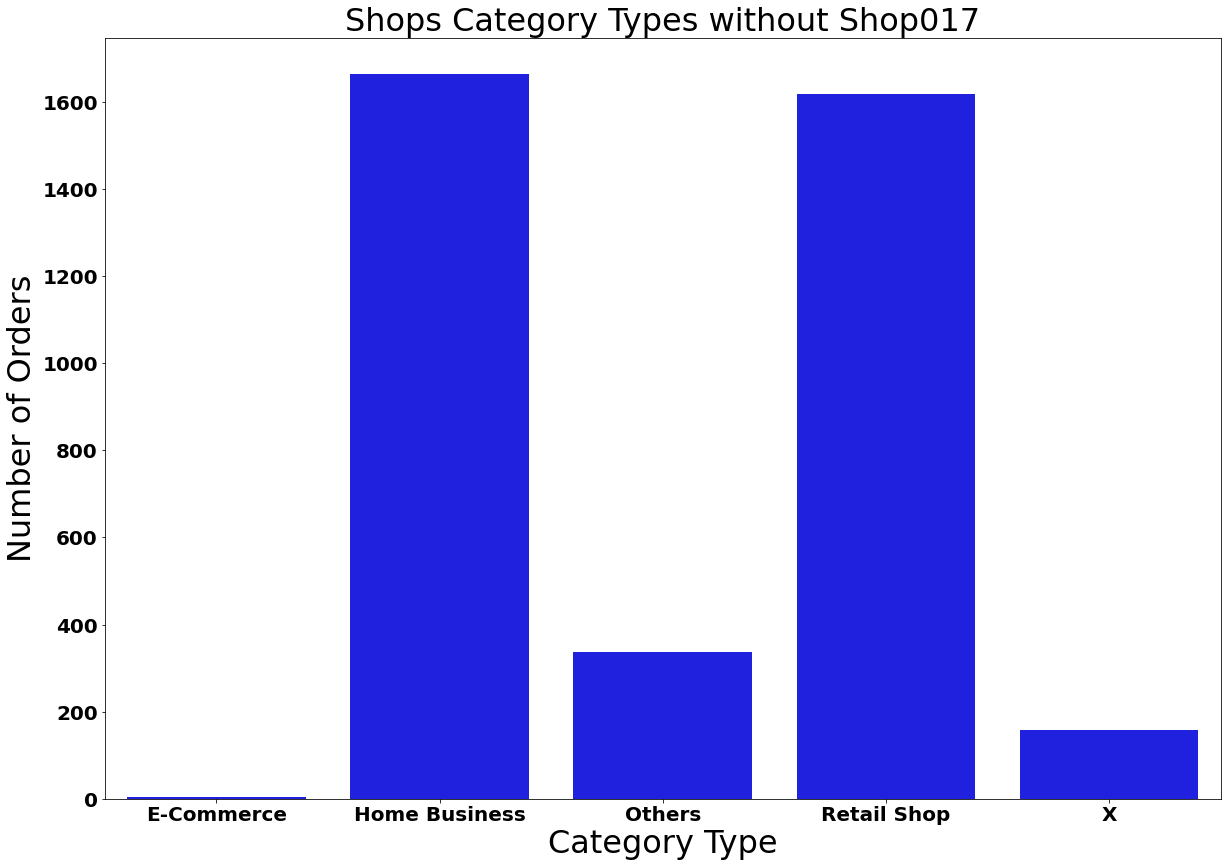

In [32]:
#without Shop017
category_types = merged_df[merged_df['Shop'] != 'Shop017'].groupby('Category Type')['Shop'].count()
ax = sns.barplot(x = category_types.index, y = category_types.values , color = "blue")

ax.set_title('Shops Category Types without Shop017')
ax.set_ylabel("Number of Orders")


So without the Shop017, Home Businesses and Retail Shops seem to take the same magnitude from Wasla.

## Display amount of orders by Business Types of Shops

Text(0.5, 1.0, 'Shops Business Types')

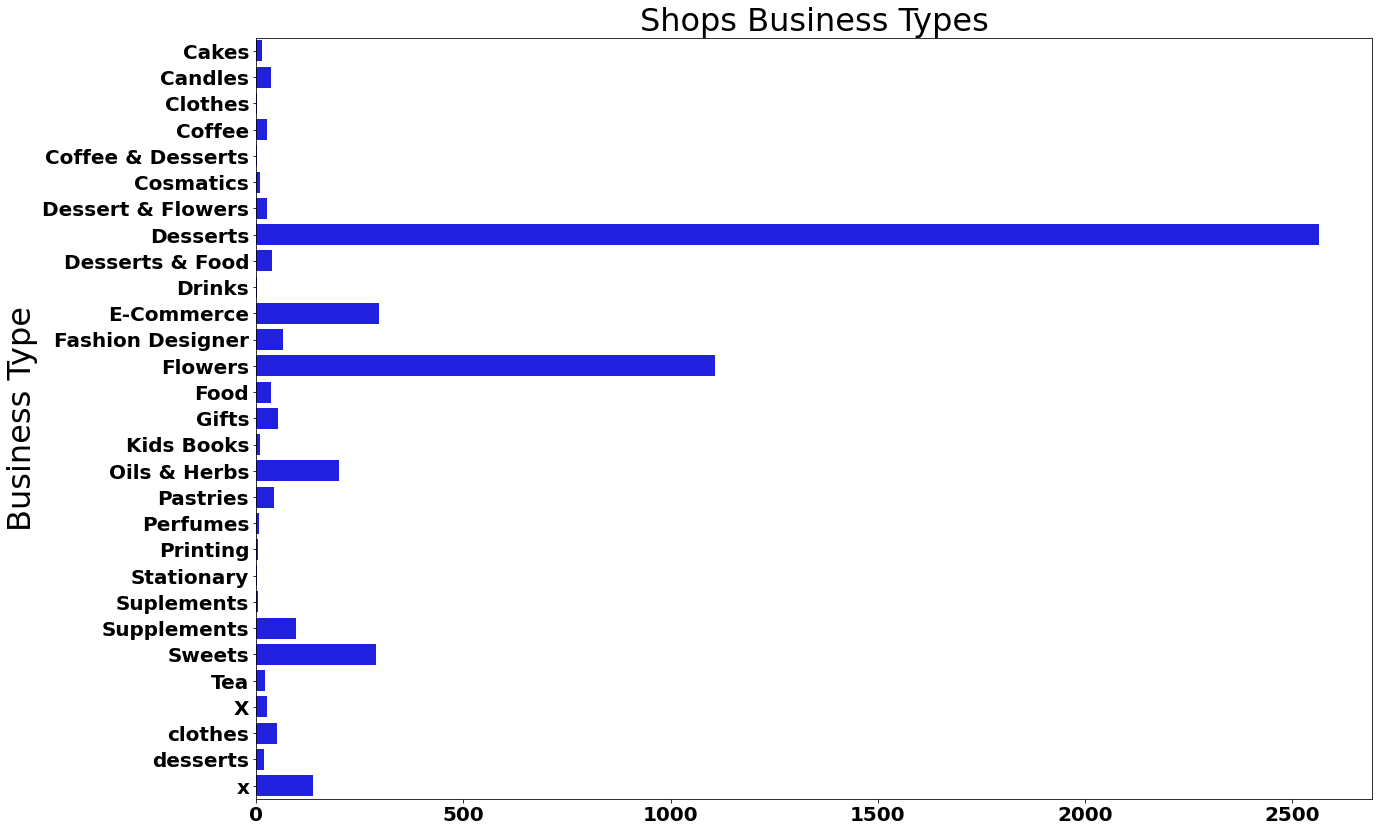

In [21]:
ax = sns.barplot(x = business_types.values, y = business_types.index , color = "blue", orient='h')
ax.set_title('Shops Business Types')


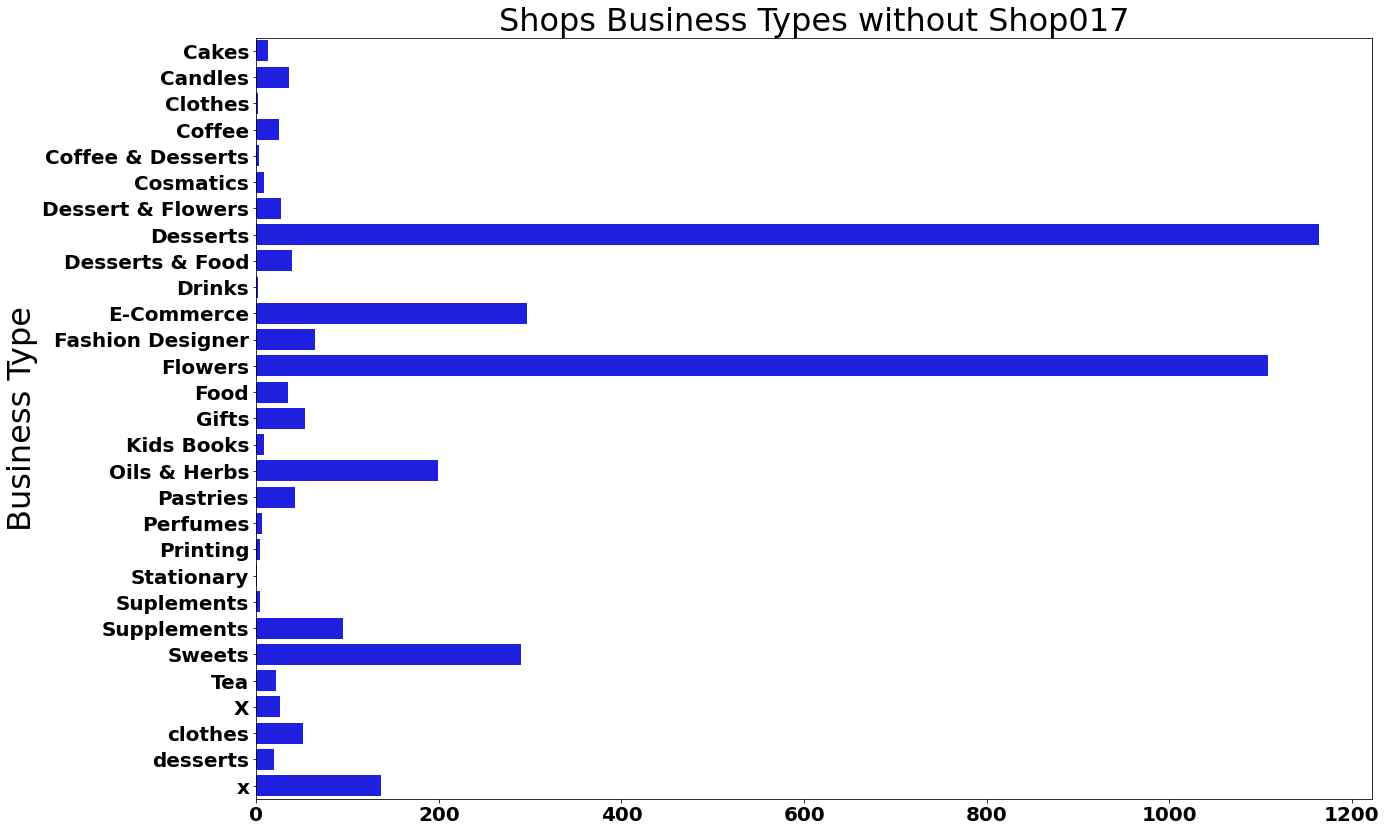

In [30]:
#without the anomally Shop017
business_types = merged_df[merged_df['Shop'] != 'Shop017'].groupby('Business Type')['Shop'].count()
ax = sns.barplot(x = business_types.values, y = business_types.index , color = "blue", orient='h').set_title('Shops Business Types without Shop017')


The highest business types of shops ordering on Wasla are Desserts then Flowers.